# **GALAXY MORPHOLOGY CLASSIFICATION USING DEEP LEARNING AND EXPLAINABLE AI**

## **Import Libraries and Initial Loading**

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.0 MB/s eta 0:00:00


In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import tensorflow as tf
from google.colab import drive
import cv2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, models, optimizers, regularizers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
import random
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to your Google Drive folder
zip_file_path_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1.zip'
zip_file_path_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1.zip'

# Folder where you want to extract the contents
extract_folder_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1'
extract_folder_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1'

# Unzipping the files
with zipfile.ZipFile(zip_file_path_1, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_1)

with zipfile.ZipFile(zip_file_path_2, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_2)

In [3]:

train_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1/images_training_rev1"
labels_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1/training_solutions_rev1.csv"



## **Preprocessing**

### **Labels**

In [7]:
# Load labels
labels_df = pd.read_csv(labels_path)


In [8]:
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [9]:
labels_df.shape

(61578, 38)

In [10]:
labels_df['image_path'] = labels_df['GalaxyID'].astype(str) + '.jpg'
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [11]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GalaxyID    61578 non-null  int64  
 1   Class1.1    61578 non-null  float64
 2   Class1.2    61578 non-null  float64
 3   Class1.3    61578 non-null  float64
 4   Class2.1    61578 non-null  float64
 5   Class2.2    61578 non-null  float64
 6   Class3.1    61578 non-null  float64
 7   Class3.2    61578 non-null  float64
 8   Class4.1    61578 non-null  float64
 9   Class4.2    61578 non-null  float64
 10  Class5.1    61578 non-null  float64
 11  Class5.2    61578 non-null  float64
 12  Class5.3    61578 non-null  float64
 13  Class5.4    61578 non-null  float64
 14  Class6.1    61578 non-null  float64
 15  Class6.2    61578 non-null  float64
 16  Class7.1    61578 non-null  float64
 17  Class7.2    61578 non-null  float64
 18  Class7.3    61578 non-null  float64
 19  Class8.1    61578 non-nul

In [12]:
# missing values
missing_values = labels_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")

Missing Values in Each Column:
GalaxyID      0
Class1.1      0
Class1.2      0
Class1.3      0
Class2.1      0
Class2.2      0
Class3.1      0
Class3.2      0
Class4.1      0
Class4.2      0
Class5.1      0
Class5.2      0
Class5.3      0
Class5.4      0
Class6.1      0
Class6.2      0
Class7.1      0
Class7.2      0
Class7.3      0
Class8.1      0
Class8.2      0
Class8.3      0
Class8.4      0
Class8.5      0
Class8.6      0
Class8.7      0
Class9.1      0
Class9.2      0
Class9.3      0
Class10.1     0
Class10.2     0
Class10.3     0
Class11.1     0
Class11.2     0
Class11.3     0
Class11.4     0
Class11.5     0
Class11.6     0
image_path    0
dtype: int64

No missing values in the dataset.


### **Images**

In [ ]:
# number of images
train_image_count = len(os.listdir(train_images_path))

print(f"Number of images in training folder: {train_image_count}")

Number of images in training folder: 61578


In [14]:
# list of image file names in the training folder
training_images = set(os.listdir(train_images_path))

filtered_labels_df = labels_df[labels_df['image_path'].isin(training_images)].copy()

filtered_labels_df.reset_index(drop=True, inplace=True)

print(f"Number of images in training folder: {len(training_images)}")
print(f"Number of rows in filtered_labels_df: {filtered_labels_df.shape[0]}")
filtered_labels_df.head()

Number of images in training folder: 61578
Number of rows in filtered_labels_df: 61578


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [16]:
def refine_classification(row):
    if row['Class1.2'] >= 0.7:  # High probability of being a Spiral galaxy
        return 'Spiral'
    elif row['Class1.1'] >= 0.7:  # High probability of being an Elliptical galaxy
        return 'Elliptical'
    else:
        return 'Uncertain'

# Apply the refine_classification function to classify galaxies
filtered_labels_df['Galaxy_Type'] = filtered_labels_df.apply(refine_classification, axis=1)

# Check the distribution of galaxy types
print(filtered_labels_df['Galaxy_Type'].value_counts())


Galaxy_Type
Uncertain     24766
Spiral        22666
Elliptical    14146
Name: count, dtype: int64


In [23]:
# Create a new DataFrame with only the necessary columns
new_galaxy_df = filtered_labels_df[['GalaxyID','Galaxy_Type', 'image_path']]

# Preview the new DataFrame
print(new_galaxy_df.head())


   GalaxyID Galaxy_Type  image_path
0    100008   Uncertain  100008.jpg
1    100023   Uncertain  100023.jpg
2    100053  Elliptical  100053.jpg
3    100078   Uncertain  100078.jpg
4    100090  Elliptical  100090.jpg


In [20]:
# Save it to a CSV file if needed
new_galaxy_df.to_csv('galaxy_classifications.csv', index=False)

In [24]:
print(f'Total number of galaxies: {len(new_galaxy_df)}')


Total number of galaxies: 61578


In [25]:
# Apply Label Encoding to the class column in balanced_data
label_encoder = LabelEncoder()
new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])

# Check the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

# Check the updated balanced_data DataFrame
print("Balanced DataFrame with Encoded Classes:")
print(new_galaxy_df.head())

Label Encoding Mapping:
{'Elliptical': 0, 'Spiral': 1, 'Uncertain': 2}
Balanced DataFrame with Encoded Classes:
   GalaxyID Galaxy_Type  image_path  class_encoded
0    100008   Uncertain  100008.jpg              2
1    100023   Uncertain  100023.jpg              2
2    100053  Elliptical  100053.jpg              0
3    100078   Uncertain  100078.jpg              2
4    100090  Elliptical  100090.jpg              0


<ipython-input-25-95caf580d9f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])


## **EDA**

Image size for 100008.jpg: (424, 424)


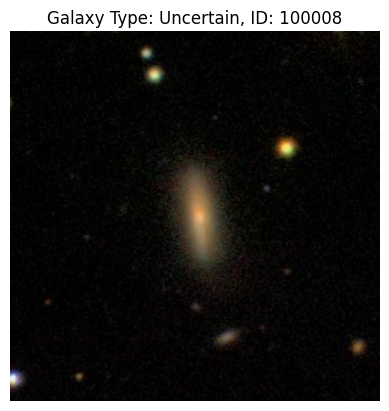

In [26]:
image_filename = new_galaxy_df.iloc[0]['image_path']  # Change index as needed
image_path = os.path.join(train_images_path, image_filename)

# Check image size
image = Image.open(image_path)
print(f"Image size for {image_filename}: {image.size}")

# Display a random image from the folder
random_image_filename = random.choice(new_galaxy_df['image_path'])  # Get a random image filename
random_image_path = os.path.join(train_images_path, random_image_filename)  # Construct the full path
random_image = Image.open(random_image_path)  # Open the image

plt.imshow(random_image)
plt.title(f"Galaxy Type: {new_galaxy_df.iloc[0]['Galaxy_Type']}, ID: {new_galaxy_df.iloc[0]['GalaxyID']}")
plt.axis('off')
plt.show()

## **Data Splitting**

In [27]:
# Create an empty list to store the selected images
limited_data = []

# Loop through each class and select up to 3000 images
for class_label in new_galaxy_df['class_encoded'].unique():
    # Filter images belonging to the class
    class_data = new_galaxy_df[new_galaxy_df['class_encoded'] == class_label]
    # If class has more than 3000 images, take the first 3000, otherwise take all
    class_data_limited = class_data.head(2000)
    limited_data.append(class_data_limited)

# Concatenate all selected images into a new DataFrame
limited_df = pd.concat(limited_data)


In [28]:
# Check the distribution of classes in the limited_df
class_distribution = limited_df['class_encoded'].value_counts()

# Print the class distribution
print("Class Distribution in Limited DataFrame:")
print(class_distribution)


Class Distribution in Limited DataFrame:
class_encoded
2    2000
0    2000
1    2000
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

# Assuming you have your dataset in new_galaxy_df with a column 'class_encoded' representing the labels

# Split the dataset into training and validation sets using stratified sampling
X = limited_df['image_path']  # Features (image paths or any other feature)
y = limited_df['class_encoded']  # Labels (encoded galaxy types)

# Perform the split, ensuring stratification based on the 'class_encoded' column
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combine the X_train and y_train into a new dataframe for the training set
train_df = pd.DataFrame({'image_path': X_train, 'class_encoded': y_train})

# Combine the X_val and y_val into a new dataframe for the validation set
val_df = pd.DataFrame({'image_path': X_val, 'class_encoded': y_val})

# Check the distribution of classes in the training and validation sets
print("Training Set Class Distribution:")
print(train_df['class_encoded'].value_counts())

print("\nValidation Set Class Distribution:")
print(val_df['class_encoded'].value_counts())


Training Set Class Distribution:
class_encoded
2    1600
1    1600
0    1600
Name: count, dtype: int64

Validation Set Class Distribution:
class_encoded
0    400
2    400
1    400
Name: count, dtype: int64


## **Augmentation**

In [30]:
# Set up image generators for data augmentation and resizing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Reduce transformation range
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Convert the class_encoded column to string type
train_df['class_encoded'] = train_df['class_encoded'].astype(str)
val_df['class_encoded'] = val_df['class_encoded'].astype(str)

# Train Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',  # Class labels as strings
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=64,
    class_mode='categorical'  # Since class labels are now strings
)

# Validation Generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',  # Class labels as strings
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=64,
    class_mode='categorical'
)

Found 4800 validated image filenames belonging to 3 classes.
Found 1200 validated image filenames belonging to 3 classes.


## **Model 1: VGG16**

### **Initialisation**

In [38]:
# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except the last block
for layer in base_model.layers[:-4]:  # Adjust layers to unfreeze for fine-tuning
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # L2 regularization
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output_layer = Dense(3, activation='softmax')(x)  # 3 output classes (Spiral, Elliptical, Uncertain)

# Create the full model
vgg16_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
vgg16_model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights for handling class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['class_encoded']),
    y=train_df['class_encoded']
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.0, 1: 1.0, 2: 1.0}


### **Training**

In [40]:
# Set callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_vgg16_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
]

# Train the model
history = vgg16_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights_dict,  # Add class weights
    callbacks=callbacks
)

Epoch 1/30
75/75 [==============================] - 152s 2s/step - loss: 2.7146 - accuracy: 0.5160 - val_loss: 2.3626 - val_accuracy: 0.6358
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 150s 2s/step - loss: 2.2264 - accuracy: 0.6269 - val_loss: 2.0060 - val_accuracy: 0.6658
Epoch 3/30
75/75 [==============================] - 151s 2s/step - loss: 1.9316 - accuracy: 0.6444 - val_loss: 1.7908 - val_accuracy: 0.6525
Epoch 4/30
75/75 [==============================] - 152s 2s/step - loss: 1.6881 - accuracy: 0.6658 - val_loss: 1.5491 - val_accuracy: 0.6908
Epoch 5/30
75/75 [==============================] - 151s 2s/step - loss: 1.5121 - accuracy: 0.6735 - val_loss: 1.4265 - val_accuracy: 0.6717
Epoch 6/30
75/75 [==============================] - 151s 2s/step - loss: 1.3547 - accuracy: 0.6894 - val_loss: 1.2636 - val_accuracy: 0.6958
Epoch 7/30
75/75 [==============================] - 153s 2s/step - loss: 1.2317 - accuracy: 0.6931 - val_loss: 1.2288 - val_accuracy: 0.6525
Epoch 8/30
75/75 [==============================] - 151s 2s/step - loss: 1.1353 - accuracy: 0.6956 - val_loss: 1.0853 - val_accuracy: 0.6892
Epoch 9/30
75/75 [======

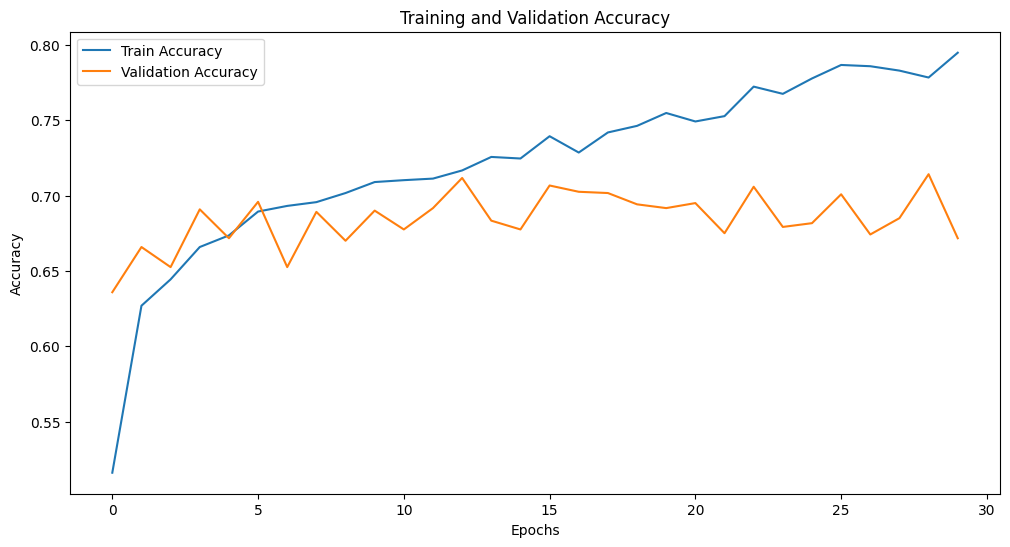

In [41]:
# Plot training and validation performance
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## **Model 2: RESNET50**

### **Initialisation**

### **Training**

## **Model3: EfficientNetB0 v2**

## **Model 4: Custom Build Model 2:**

### **Initialisation**

In [46]:
def custom_cnn_model():
    custom_cnn_model = Sequential()

    # First Convolutional Block
    custom_cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Block
    custom_cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    custom_cnn_model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Block
    custom_cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    custom_cnn_model.add(MaxPooling2D((2, 2)))

    # Flatten the feature maps
    custom_cnn_model.add(Flatten())

    # Fully connected (Dense) layer with regularization
    custom_cnn_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
    custom_cnn_model.add(Dropout(0.5))  # Dropout to prevent overfitting

    # Output layer with softmax activation for multi-class classification
    custom_cnn_model.add(Dense(3, activation='softmax'))  # 3 output classes (Spiral, Elliptical, Uncertain)

    # Compile the model
    custom_cnn_model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the custom CNN model
custom_cnn_model = custom_cnn_model()

# Display the model architecture
custom_cnn_model.summary()

ValueError: Input 0 of layer "max_pooling2d_3" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 3)

### **Training**

In [45]:
# Train the custom CNN model
history = custommodel.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # You can adjust the number of epochs based on the training progress
    class_weight=class_weights_dict,  # Add class weights to handle class imbalance
    callbacks=callbacks  # EarlyStopping and ModelCheckpoint
)


Epoch 1/30
75/75 [==============================] - 96s 1s/step - loss: 2.6526 - accuracy: 0.4098 - val_loss: 1.1702 - val_accuracy: 0.5042
Epoch 2/30
75/75 [==============================] - 94s 1s/step - loss: 1.0706 - accuracy: 0.5071 - val_loss: 1.0201 - val_accuracy: 0.5100
Epoch 3/30
23/75 [========>.....................] - ETA: 59s - loss: 1.0462 - accuracy: 0.4823 

KeyboardInterrupt: 

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## **Model 5: Ensemble Model**